# Double Hafu Score Betting Model

In this project, I am trying to see if there is any profitability in HKJC Pari-Mutuel Pools in football. The rule is oof double hafu is as followed: predict the first half and the full time exact score results of two selected matches. Dividend for each winning bet is determined by the total investment in the pool and the number of winning units. 



# Workflow

1) Strategy creation

2) Model Implementation

3) Back Testing

4) Real Money Testing

### 1) Strategy Creation

The strategy of pari-mutuel pool is to try to cover the combinations with highest probability with the least amount of units. In order to obtain the probability of each correct scores, the quick way is to use the odds from bookmakers. Oddsportal is a website that have odds that cover most matches in the world.

### 2) Model Iplementation

In [10]:
import requests
#import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import Select
import time

In [11]:
def getodds(url):
    PATH = r'C:\Users\xdsherman\Documents\chromedriver.exe'
    driver=webdriver.Chrome(PATH)
    driver.get(url)
    odds=[]
    element = driver.find_element_by_id('odds-data-table').text
    element=element.split('\n')
    for i in element[:]:
        if i.find(':')==-1 and i.find('.')==-1:
            element.remove(i)
    for i in range(len(element)):
        if i!=len(element)-1:
            if element[i].find(':')!=-1: #if ':' exist
                if element[i+1].find(':')==-1: #if ':' not exist
                    odds.append([element[i],float(element[i+1])])
                else:
                    odds.append([element[i],99999])
    return odds
        #firstMatch

We need to have probabilities for 4 things, first match first half score, first match second half score,second match first half score and second match second half score.
The match I picked here is champions league Chelsea - Atl. Madrid. 

In [14]:
firstMatchFirstHalf=getodds('https://www.oddsportal.com/soccer/europe/champions-league/chelsea-atl-madrid-6FbO1fsj/#cs;3')
firstMatchSecondHalf=getodds('https://www.oddsportal.com/soccer/europe/champions-league/chelsea-atl-madrid-6FbO1fsj/#cs;4')
secondMatchFirstHalf=getodds('https://www.oddsportal.com/soccer/europe/champions-league/bayern-munich-lazio-G4rRLFYL/#cs;3')
secondMatchSecondHalf=getodds('https://www.oddsportal.com/soccer/europe/champions-league/bayern-munich-lazio-G4rRLFYL/#cs;4')

Multiply the odds of first half score and second half score to get the odds of whole half time full time score. The highest probability is the combination with the lowest odds

In [18]:
firstMatch=[]
for i in firstMatchFirstHalf:
    for j in firstMatchSecondHalf:
        firstMatch.append([i[0]+'-'+j[0],float(i[1])*float(j[1])])
firstMatch[:10]

[['1:0-1:0', 16.6866],
 ['1:0-2:0', 42.792399999999994],
 ['1:0-2:1', 72.38979999999998],
 ['1:0-3:0', 151.032],
 ['1:0-3:1', 230.60799999999998],
 ['1:0-3:2', 469.94499999999994],
 ['1:0-4:0', 328.85999999999996],
 ['1:0-4:1', 369.46],
 ['1:0-4:2', 405995.93999999994],
 ['1:0-4:3', 405995.93999999994]]

In [19]:
secondMatch=[]
for i in secondMatchFirstHalf:
    for j in secondMatchSecondHalf:
        secondMatch.append([i[0]+'-'+j[0],float(i[1])*float(j[1])])
secondMatch[:10]

[['1:0-1:0', 16.732],
 ['1:0-2:0', 20.9808],
 ['1:0-2:1', 33.7648],
 ['1:0-3:0', 38.352],
 ['1:0-3:1', 64.296],
 ['1:0-3:2', 172.20799999999997],
 ['1:0-4:0', 105.28],
 ['1:0-4:1', 154.16],
 ['1:0-4:2', 417.35999999999996],
 ['1:0-4:3', 375996.24]]

multiply the odds of the first match and the second match to get the final result

In [20]:
result=[]
for i in firstMatch:
    for j in secondMatch:
        result.append([i[0]+'--'+j[0],i[1]*j[1]])

In [21]:
temp=result.copy()

sort the result in acending order

In [22]:
temp.sort(key=lambda temp:temp[1],reverse=False)
temp[:10]

[['0:0-0:0--1:0-1:0', 109.55277],
 ['0:0-0:0--0:0-1:0', 133.73596125],
 ['0:0-0:0--1:0-2:0', 137.371788],
 ['0:0-1:0--1:0-1:0', 154.72917],
 ['0:0-0:0--1:0-0:0', 156.081924],
 ['0:0-0:0--1:0-1:1', 167.40648],
 ['0:0-0:0--0:0-2:0', 167.6958795],
 ['0:0-0:0--2:0-1:0', 170.73915750000003],
 ['0:0-0:1--1:0-1:0', 187.48206000000002],
 ['0:0-1:0--0:0-1:0', 188.88481125]]

Function to find how many units do you need to buy in order to hit the jackpot.

In [23]:
def find_score(score):
    for i in range(len(temp)):
        if temp[i][0]==score:
            print(temp[i][0])
            print(i)

In [24]:
find_score('1:0-1:0--1:0-1:1')

1:0-1:0--1:0-1:1
106


### 3) Back testing

Use the result from 24/05/2020 to 20/10/2020, total 119 matchest to test the result. The strategy is to buy the highest 20 cominations every time, costing $200 each time ($10 per unit).

Cost: \\$23800 (\\$119*200)

Profit: \\$49553

Net Profit: \\$25753

### 4) Real Money Testing

I bet all matches during November 2020. There are 19 matches in total 

Cost: \\$3800 (\\$200*19)

Profit: \\$7844

Net Profit: $4044

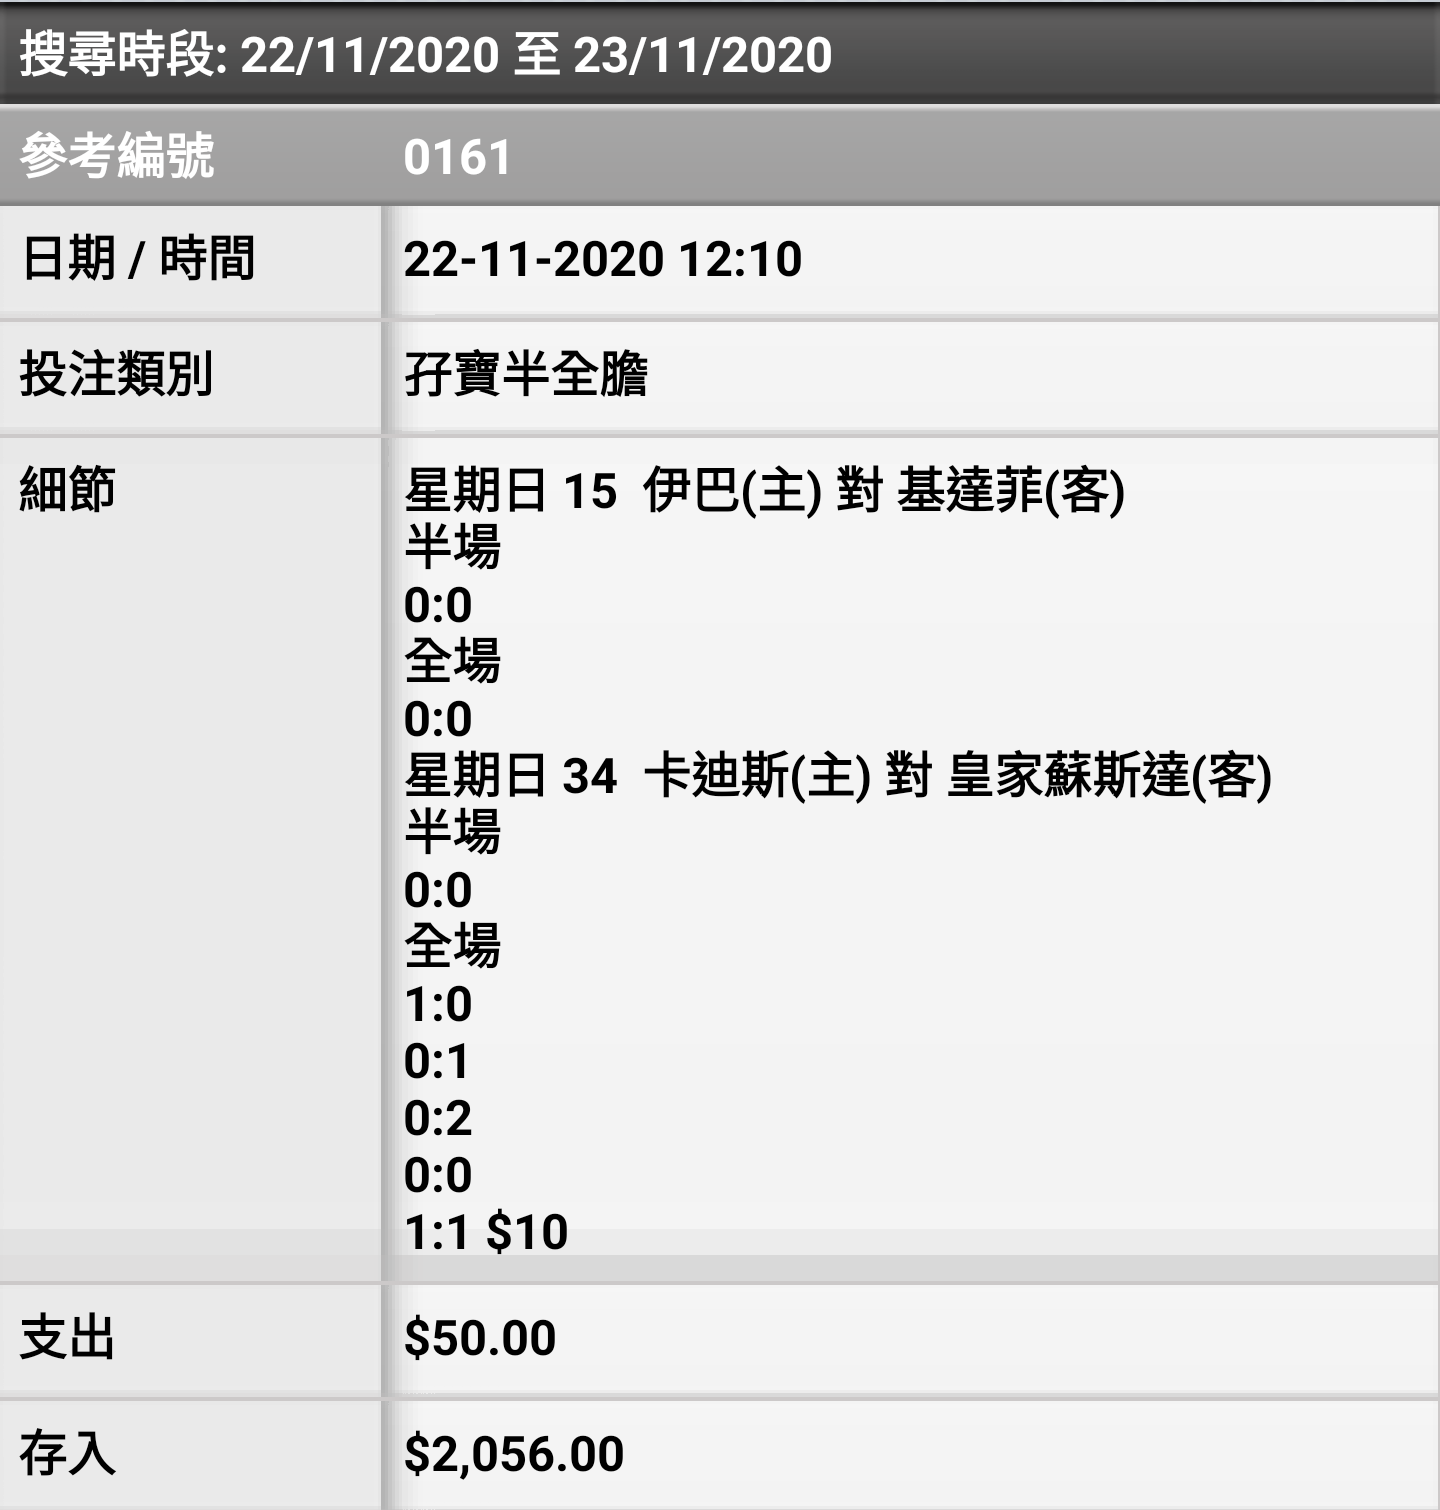

In [33]:
from IPython.display import Image
Image(filename='Screenshot_20201123-062115_2.png',width = 600, height = 300)

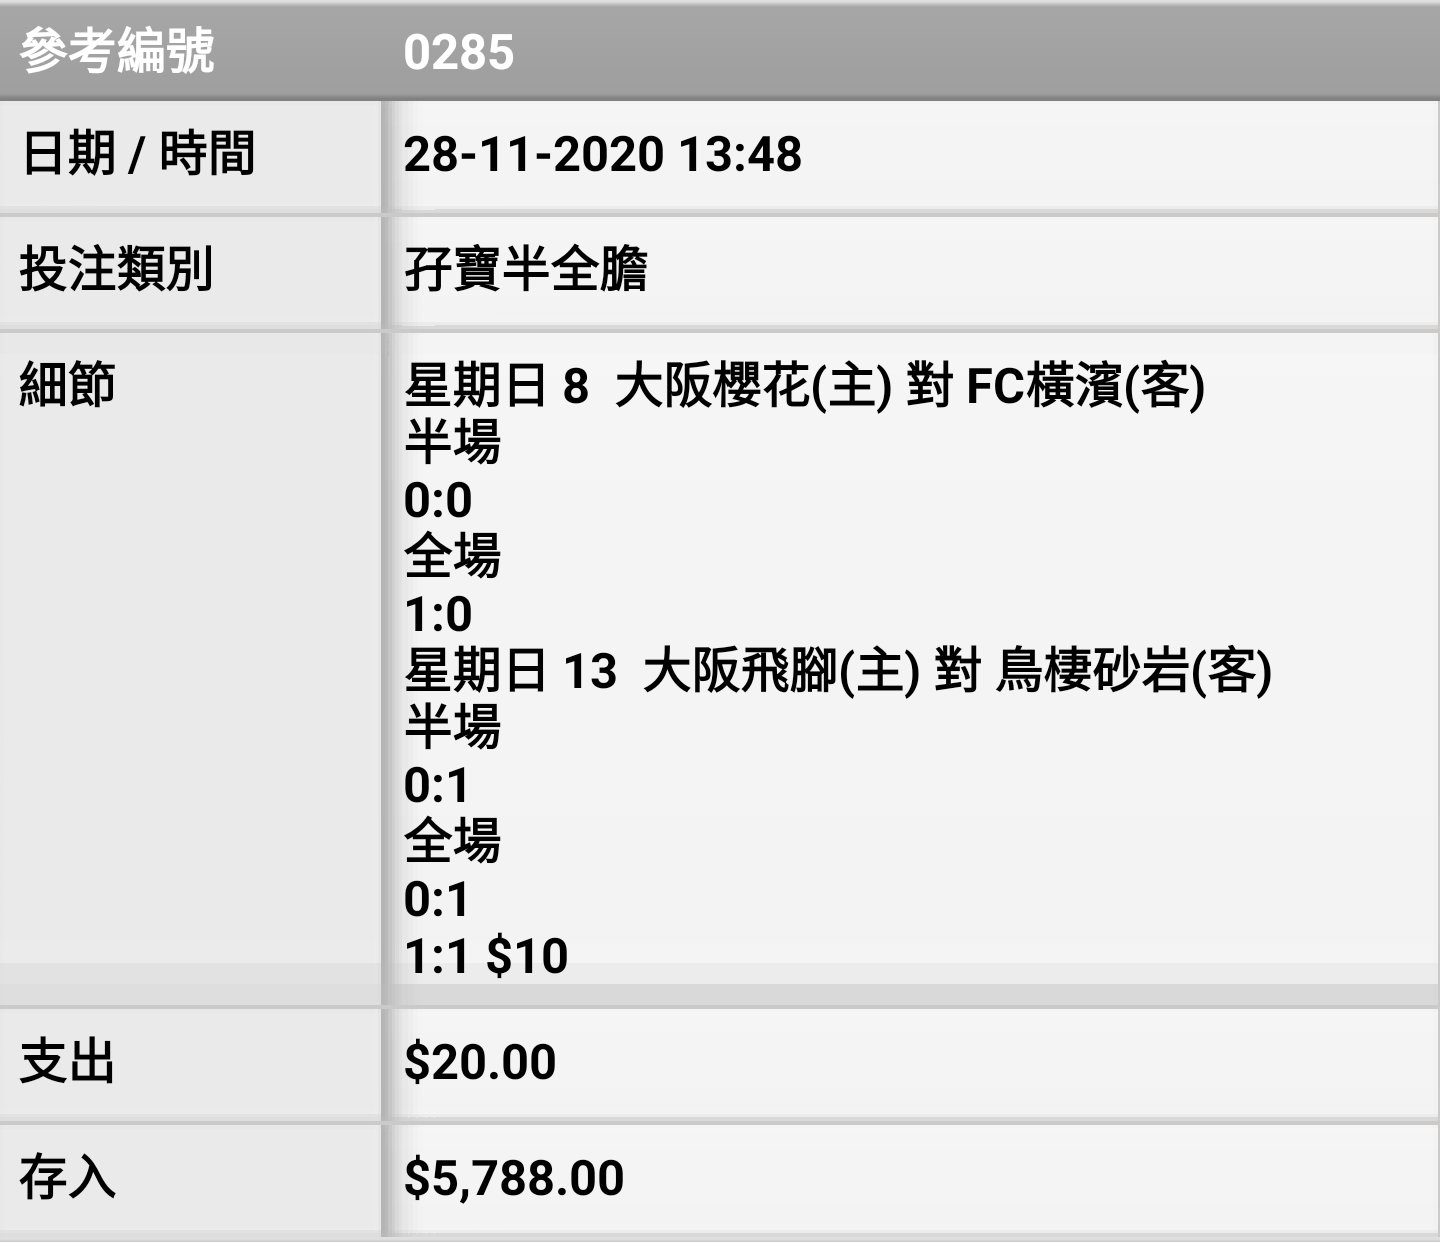

In [36]:
Image(filename='Screenshot_20201129-194937_2.png',width = 600, height = 300)